# Keras - Advanced (Bessaker)

bla

#### Importere biblioteker

In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Making plots look better (Jupyter Notebook spesific)
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True

# Built in jupyter notebook commands
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#### Importere datasett

In [2]:
data_raw = pd.read_csv('data_bessaker_advanced.csv',sep =';', low_memory = False)

data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237 entries, 0 to 5236
Data columns (total 69 columns):
BESS-Bessakerfj.-G1-T4015A3 -0104      5237 non-null float64
RRS.S2464.Gunit.M1-7 G1.AVL            5237 non-null int64
BESS-Bessakerfj.-G2-T4015A3 -0104      5237 non-null float64
RRS.S2464.Gunit.M1-7 G2.AVL            5237 non-null int64
BESS-Bessakerfj.-G3-T4015A3 -0104      5237 non-null float64
RRS.S2464.Gunit.M1-7 G3.AVL            5237 non-null int64
BESS-Bessakerfj.-G4-T4015A3 -0104      5237 non-null float64
RRS.S2464.Gunit.M1-7 G4.AVL            5237 non-null int64
BESS-Bessakerfj.-G5-T4015A3 -0104      5237 non-null float64
RRS.S2464.Gunit.M1-7 G5.AVL            5237 non-null int64
BESS-Bessakerfj.-G6-T4015A3 -0104      5237 non-null float64
RRS.S2464.Gunit.M1-7 G6.AVL            5237 non-null int64
BESS-Bessakerfj.-G7-T4015A3 -0104      5237 non-null float64
RRS.S2464.Gunit.M1-7 G7.AVL            5237 non-null int64
BESS-Bessakerfj.-G8-T4015A3 -0104      5237 non-null 

In [3]:
data = data_raw.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5187 entries, 0 to 5236
Data columns (total 69 columns):
BESS-Bessakerfj.-G1-T4015A3 -0104      5187 non-null float64
RRS.S2464.Gunit.M1-7 G1.AVL            5187 non-null int64
BESS-Bessakerfj.-G2-T4015A3 -0104      5187 non-null float64
RRS.S2464.Gunit.M1-7 G2.AVL            5187 non-null int64
BESS-Bessakerfj.-G3-T4015A3 -0104      5187 non-null float64
RRS.S2464.Gunit.M1-7 G3.AVL            5187 non-null int64
BESS-Bessakerfj.-G4-T4015A3 -0104      5187 non-null float64
RRS.S2464.Gunit.M1-7 G4.AVL            5187 non-null int64
BESS-Bessakerfj.-G5-T4015A3 -0104      5187 non-null float64
RRS.S2464.Gunit.M1-7 G5.AVL            5187 non-null int64
BESS-Bessakerfj.-G6-T4015A3 -0104      5187 non-null float64
RRS.S2464.Gunit.M1-7 G6.AVL            5187 non-null int64
BESS-Bessakerfj.-G7-T4015A3 -0104      5187 non-null float64
RRS.S2464.Gunit.M1-7 G7.AVL            5187 non-null int64
BESS-Bessakerfj.-G8-T4015A3 -0104      5187 non-null 

In [4]:
num_features = len(data.columns) -1
print(num_features)

68


#### Konvertere til numpy-arrays

In [5]:
# Konverterer pandas.DataFrame til en numpy array
all_features_and_target_value = data.values.astype("float32")

In [6]:
# Trekker ut alle features (5 aromepunkter med 4 features + delayed = 21 features)
x = all_features_and_target_value[:,0:num_features]

In [7]:
# Trekker ut produksjonen som y-verdi
y = all_features_and_target_value[:,num_features]

#### Skalere data

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Lage en scaler
scaler = MinMaxScaler()

# Anvende på features, her lagret i variablen x.
x = scaler.fit_transform(x)

#### Train/test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 67)

# Keras

In [11]:
import tensorflow as tf

#### Importere modellen

In [12]:
from tensorflow.contrib.keras import models

In [13]:
dnn_keras_model = models.Sequential()

#### Sette opp layers

In [14]:
from tensorflow.contrib.keras import layers

In [15]:
# Input layer
dnn_keras_model.add(layers.Dense(units=128, input_dim= num_features, activation='relu'))

In [16]:
'''Hidden Layers'''

dnn_keras_model.add(layers.Dense(units=64,activation='relu'))

dnn_keras_model.add(layers.Dense(units=32,activation='relu'))

dnn_keras_model.add(layers.Dense(units=16,activation='relu'))

dnn_keras_model.add(layers.Dense(units=8,activation='relu'))

dnn_keras_model.add(layers.Dense(units=2,activation='relu'))


In [17]:
# Output Layer
dnn_keras_model.add(layers.Dense(1))

#### Kompilere modellen

In [18]:
from tensorflow.contrib.keras import losses,optimizers,metrics,activations

In [19]:
#Kompilere - Alternative lossfunctions: mean_squared_error
dnn_keras_model.compile(optimizer='adam', loss = 'mean_absolute_error')

#### Trene modellen

In [20]:
from tensorflow.contrib.keras import losses,optimizers,metrics,activations

#### Callbacks og checkpoints

In [21]:
from tensorflow.contrib.keras import callbacks

In [22]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=500)

checkpoint = callbacks.ModelCheckpoint('checkpoint_model_bessaker_advanced.h5', monitor = 'val_loss', 
                                       verbose = 1, save_best_only= True, mode= 'min')

In [23]:
# Trene modellen
np.random.seed(7)
dnn_keras_model.fit(X_train,y_train, epochs = 5000, batch_size=50, verbose=2, validation_data=(X_test, y_test),
                   callbacks=[checkpoint,early_stopping])


# validation_split=0.20
#validation_data=(X_test, y_test)

Train on 3630 samples, validate on 1557 samples
Epoch 1/5000
Epoch 00000: val_loss improved from inf to 7.18159, saving model to checkpoint_model_bessaker_advanced.h5
0s - loss: 14.7909 - val_loss: 7.1816
Epoch 2/5000
Epoch 00001: val_loss improved from 7.18159 to 4.48114, saving model to checkpoint_model_bessaker_advanced.h5
0s - loss: 5.0543 - val_loss: 4.4811
Epoch 3/5000
Epoch 00002: val_loss improved from 4.48114 to 4.47969, saving model to checkpoint_model_bessaker_advanced.h5
0s - loss: 4.5803 - val_loss: 4.4797
Epoch 4/5000
Epoch 00003: val_loss improved from 4.47969 to 4.47568, saving model to checkpoint_model_bessaker_advanced.h5
0s - loss: 4.5924 - val_loss: 4.4757
Epoch 5/5000
Epoch 00004: val_loss improved from 4.47568 to 4.47393, saving model to checkpoint_model_bessaker_advanced.h5
0s - loss: 4.5338 - val_loss: 4.4739
Epoch 6/5000
Epoch 00005: val_loss improved from 4.47393 to 4.43974, saving model to checkpoint_model_bessaker_advanced.h5
0s - loss: 4.5848 - val_loss: 4.

Epoch 00075: val_loss did not improve
0s - loss: 4.0303 - val_loss: 4.3253
Epoch 77/5000
Epoch 00076: val_loss did not improve
0s - loss: 4.0977 - val_loss: 4.4529
Epoch 78/5000
Epoch 00077: val_loss did not improve
0s - loss: 4.0394 - val_loss: 4.3869
Epoch 79/5000
Epoch 00078: val_loss did not improve
0s - loss: 3.9743 - val_loss: 4.1928
Epoch 80/5000
Epoch 00079: val_loss did not improve
0s - loss: 3.9969 - val_loss: 4.2005
Epoch 81/5000
Epoch 00080: val_loss did not improve
0s - loss: 4.0015 - val_loss: 4.1686
Epoch 82/5000
Epoch 00081: val_loss did not improve
0s - loss: 4.1962 - val_loss: 4.4172
Epoch 83/5000
Epoch 00082: val_loss improved from 4.16081 to 4.14714, saving model to checkpoint_model_bessaker_advanced.h5
0s - loss: 4.0138 - val_loss: 4.1471
Epoch 84/5000
Epoch 00083: val_loss did not improve
0s - loss: 3.9550 - val_loss: 4.1538
Epoch 85/5000
Epoch 00084: val_loss did not improve
0s - loss: 4.0159 - val_loss: 4.1766
Epoch 86/5000
Epoch 00085: val_loss did not improve


Epoch 00157: val_loss did not improve
0s - loss: 3.6798 - val_loss: 4.7050
Epoch 159/5000
Epoch 00158: val_loss did not improve
0s - loss: 3.7485 - val_loss: 4.0702
Epoch 160/5000
Epoch 00159: val_loss did not improve
0s - loss: 3.6486 - val_loss: 4.0390
Epoch 161/5000
Epoch 00160: val_loss did not improve
0s - loss: 3.6340 - val_loss: 4.0612
Epoch 162/5000
Epoch 00161: val_loss did not improve
0s - loss: 3.5999 - val_loss: 4.0370
Epoch 163/5000
Epoch 00162: val_loss did not improve
0s - loss: 3.5707 - val_loss: 4.1390
Epoch 164/5000
Epoch 00163: val_loss did not improve
0s - loss: 3.6114 - val_loss: 4.0614
Epoch 165/5000
Epoch 00164: val_loss did not improve
0s - loss: 3.6125 - val_loss: 4.0929
Epoch 166/5000
Epoch 00165: val_loss did not improve
0s - loss: 3.6207 - val_loss: 4.0435
Epoch 167/5000
Epoch 00166: val_loss did not improve
0s - loss: 3.6372 - val_loss: 4.0375
Epoch 168/5000
Epoch 00167: val_loss did not improve
0s - loss: 3.6150 - val_loss: 4.2126
Epoch 169/5000
Epoch 0016

Epoch 00244: val_loss did not improve
0s - loss: 3.3320 - val_loss: 3.9130
Epoch 246/5000
Epoch 00245: val_loss did not improve
0s - loss: 3.3278 - val_loss: 3.9350
Epoch 247/5000
Epoch 00246: val_loss did not improve
0s - loss: 3.3186 - val_loss: 3.9350
Epoch 248/5000
Epoch 00247: val_loss improved from 3.89601 to 3.89359, saving model to checkpoint_model_bessaker_advanced.h5
0s - loss: 3.2492 - val_loss: 3.8936
Epoch 249/5000
Epoch 00248: val_loss did not improve
0s - loss: 3.2865 - val_loss: 4.1035
Epoch 250/5000
Epoch 00249: val_loss did not improve
0s - loss: 3.1985 - val_loss: 3.8977
Epoch 251/5000
Epoch 00250: val_loss did not improve
0s - loss: 3.2432 - val_loss: 4.0957
Epoch 252/5000
Epoch 00251: val_loss did not improve
0s - loss: 3.2728 - val_loss: 3.9450
Epoch 253/5000
Epoch 00252: val_loss did not improve
0s - loss: 3.3033 - val_loss: 3.9490
Epoch 254/5000
Epoch 00253: val_loss did not improve
0s - loss: 3.3056 - val_loss: 3.9300
Epoch 255/5000
Epoch 00254: val_loss did no

Epoch 00334: val_loss did not improve
0s - loss: 3.0160 - val_loss: 3.9707
Epoch 336/5000
Epoch 00335: val_loss did not improve
0s - loss: 3.0445 - val_loss: 4.0785
Epoch 337/5000
Epoch 00336: val_loss did not improve
0s - loss: 3.1680 - val_loss: 4.0755
Epoch 338/5000
Epoch 00337: val_loss did not improve
0s - loss: 3.0094 - val_loss: 3.9391
Epoch 339/5000
Epoch 00338: val_loss did not improve
0s - loss: 2.9515 - val_loss: 3.9730
Epoch 340/5000
Epoch 00339: val_loss did not improve
0s - loss: 2.9225 - val_loss: 4.0473
Epoch 341/5000
Epoch 00340: val_loss did not improve
0s - loss: 3.0036 - val_loss: 3.9660
Epoch 342/5000
Epoch 00341: val_loss did not improve
0s - loss: 2.9583 - val_loss: 3.9686
Epoch 343/5000
Epoch 00342: val_loss did not improve
0s - loss: 2.8963 - val_loss: 4.0975
Epoch 344/5000
Epoch 00343: val_loss did not improve
0s - loss: 2.8789 - val_loss: 3.9556
Epoch 345/5000
Epoch 00344: val_loss did not improve
0s - loss: 2.9075 - val_loss: 4.0050
Epoch 346/5000
Epoch 0034

Epoch 00425: val_loss did not improve
0s - loss: 2.7270 - val_loss: 3.9568
Epoch 427/5000
Epoch 00426: val_loss did not improve
0s - loss: 2.6268 - val_loss: 3.9845
Epoch 428/5000
Epoch 00427: val_loss did not improve
0s - loss: 2.6355 - val_loss: 3.9398
Epoch 429/5000
Epoch 00428: val_loss did not improve
0s - loss: 2.6098 - val_loss: 3.9470
Epoch 430/5000
Epoch 00429: val_loss did not improve
0s - loss: 2.6602 - val_loss: 4.1378
Epoch 431/5000
Epoch 00430: val_loss did not improve
0s - loss: 2.6996 - val_loss: 4.0816
Epoch 432/5000
Epoch 00431: val_loss did not improve
0s - loss: 2.6821 - val_loss: 3.8976
Epoch 433/5000
Epoch 00432: val_loss did not improve
0s - loss: 2.5982 - val_loss: 3.9016
Epoch 434/5000
Epoch 00433: val_loss did not improve
0s - loss: 2.6057 - val_loss: 3.9007
Epoch 435/5000
Epoch 00434: val_loss did not improve
0s - loss: 2.6397 - val_loss: 3.9164
Epoch 436/5000
Epoch 00435: val_loss did not improve
0s - loss: 2.6255 - val_loss: 3.9394
Epoch 437/5000
Epoch 0043

Epoch 00515: val_loss did not improve
0s - loss: 2.3702 - val_loss: 3.9867
Epoch 517/5000
Epoch 00516: val_loss did not improve
0s - loss: 2.3421 - val_loss: 3.8700
Epoch 518/5000
Epoch 00517: val_loss did not improve
0s - loss: 2.3837 - val_loss: 3.9297
Epoch 519/5000
Epoch 00518: val_loss did not improve
0s - loss: 2.3380 - val_loss: 3.9345
Epoch 520/5000
Epoch 00519: val_loss did not improve
0s - loss: 2.4107 - val_loss: 4.0164
Epoch 521/5000
Epoch 00520: val_loss did not improve
0s - loss: 2.4222 - val_loss: 3.9210
Epoch 522/5000
Epoch 00521: val_loss did not improve
0s - loss: 2.4926 - val_loss: 3.9305
Epoch 523/5000
Epoch 00522: val_loss did not improve
0s - loss: 2.3622 - val_loss: 4.0044
Epoch 524/5000
Epoch 00523: val_loss did not improve
0s - loss: 2.3790 - val_loss: 3.9228
Epoch 525/5000
Epoch 00524: val_loss did not improve
0s - loss: 2.3512 - val_loss: 3.8786
Epoch 526/5000
Epoch 00525: val_loss did not improve
0s - loss: 2.3432 - val_loss: 3.8323
Epoch 527/5000
Epoch 0052

Epoch 00607: val_loss did not improve
0s - loss: 2.2138 - val_loss: 3.8577
Epoch 609/5000
Epoch 00608: val_loss did not improve
0s - loss: 2.2484 - val_loss: 3.8783
Epoch 610/5000
Epoch 00609: val_loss did not improve
0s - loss: 2.2689 - val_loss: 3.9123
Epoch 611/5000
Epoch 00610: val_loss did not improve
0s - loss: 2.1998 - val_loss: 3.9628
Epoch 612/5000
Epoch 00611: val_loss did not improve
0s - loss: 2.1313 - val_loss: 3.9452
Epoch 613/5000
Epoch 00612: val_loss did not improve
0s - loss: 2.1046 - val_loss: 3.8575
Epoch 614/5000
Epoch 00613: val_loss did not improve
0s - loss: 2.1063 - val_loss: 3.9399
Epoch 615/5000
Epoch 00614: val_loss did not improve
0s - loss: 2.1383 - val_loss: 3.8844
Epoch 616/5000
Epoch 00615: val_loss did not improve
0s - loss: 2.2434 - val_loss: 3.9033
Epoch 617/5000
Epoch 00616: val_loss did not improve
0s - loss: 2.1744 - val_loss: 3.8752
Epoch 618/5000
Epoch 00617: val_loss did not improve
0s - loss: 2.2279 - val_loss: 4.2714
Epoch 619/5000
Epoch 0061

Epoch 00699: val_loss did not improve
0s - loss: 1.9538 - val_loss: 3.9423
Epoch 701/5000
Epoch 00700: val_loss did not improve
0s - loss: 1.9057 - val_loss: 3.9237
Epoch 702/5000
Epoch 00701: val_loss did not improve
0s - loss: 2.0146 - val_loss: 3.8970
Epoch 703/5000
Epoch 00702: val_loss did not improve
0s - loss: 1.9542 - val_loss: 3.8930
Epoch 704/5000
Epoch 00703: val_loss did not improve
0s - loss: 1.9176 - val_loss: 3.8445
Epoch 705/5000
Epoch 00704: val_loss did not improve
0s - loss: 2.0393 - val_loss: 3.9702
Epoch 706/5000
Epoch 00705: val_loss did not improve
0s - loss: 1.9572 - val_loss: 3.9091
Epoch 707/5000
Epoch 00706: val_loss did not improve
0s - loss: 1.9399 - val_loss: 3.9349
Epoch 708/5000
Epoch 00707: val_loss did not improve
0s - loss: 1.9748 - val_loss: 3.8900
Epoch 709/5000
Epoch 00708: val_loss did not improve
0s - loss: 1.9543 - val_loss: 3.9183
Epoch 710/5000
Epoch 00709: val_loss did not improve
0s - loss: 1.9978 - val_loss: 3.9689
Epoch 711/5000
Epoch 0071

Epoch 00791: val_loss did not improve
0s - loss: 1.8266 - val_loss: 3.9044
Epoch 793/5000
Epoch 00792: val_loss did not improve
0s - loss: 1.7575 - val_loss: 3.9549
Epoch 794/5000
Epoch 00793: val_loss did not improve
0s - loss: 1.7841 - val_loss: 3.8925
Epoch 795/5000
Epoch 00794: val_loss did not improve
0s - loss: 1.8033 - val_loss: 3.9192
Epoch 796/5000
Epoch 00795: val_loss did not improve
0s - loss: 1.7668 - val_loss: 3.9112
Epoch 797/5000
Epoch 00796: val_loss did not improve
0s - loss: 1.8012 - val_loss: 4.0331
Epoch 798/5000
Epoch 00797: val_loss did not improve
0s - loss: 1.8273 - val_loss: 3.8786
Epoch 799/5000
Epoch 00798: val_loss did not improve
0s - loss: 1.8089 - val_loss: 3.9480
Epoch 800/5000
Epoch 00799: val_loss did not improve
0s - loss: 1.7837 - val_loss: 4.1015
Epoch 801/5000
Epoch 00800: val_loss did not improve
0s - loss: 1.9052 - val_loss: 3.9596
Epoch 802/5000
Epoch 00801: val_loss did not improve
0s - loss: 1.8275 - val_loss: 3.9097
Epoch 803/5000
Epoch 0080

Epoch 00883: val_loss did not improve
0s - loss: 1.6836 - val_loss: 3.9432
Epoch 885/5000
Epoch 00884: val_loss did not improve
0s - loss: 1.6487 - val_loss: 3.9512
Epoch 886/5000
Epoch 00885: val_loss did not improve
0s - loss: 1.6801 - val_loss: 3.9391
Epoch 887/5000
Epoch 00886: val_loss did not improve
0s - loss: 1.7566 - val_loss: 4.1071
Epoch 888/5000
Epoch 00887: val_loss did not improve
0s - loss: 1.7441 - val_loss: 3.9815
Epoch 889/5000
Epoch 00888: val_loss did not improve
0s - loss: 1.7278 - val_loss: 3.9453
Epoch 890/5000
Epoch 00889: val_loss did not improve
0s - loss: 1.6535 - val_loss: 3.9748
Epoch 891/5000
Epoch 00890: val_loss did not improve
0s - loss: 1.7038 - val_loss: 4.0365
Epoch 892/5000
Epoch 00891: val_loss did not improve
0s - loss: 1.7452 - val_loss: 4.0498
Epoch 893/5000
Epoch 00892: val_loss did not improve
0s - loss: 1.6353 - val_loss: 4.0032
Epoch 894/5000
Epoch 00893: val_loss did not improve
0s - loss: 1.6616 - val_loss: 3.9659
Epoch 895/5000
Epoch 0089

Epoch 00975: val_loss did not improve
0s - loss: 1.5723 - val_loss: 3.9694
Epoch 977/5000
Epoch 00976: val_loss did not improve
0s - loss: 1.6308 - val_loss: 4.0647
Epoch 978/5000
Epoch 00977: val_loss did not improve
0s - loss: 1.5648 - val_loss: 3.9923
Epoch 979/5000
Epoch 00978: val_loss did not improve
0s - loss: 1.6690 - val_loss: 4.0994
Epoch 980/5000
Epoch 00979: val_loss did not improve
0s - loss: 1.6320 - val_loss: 3.9349
Epoch 981/5000
Epoch 00980: val_loss did not improve
0s - loss: 1.5146 - val_loss: 4.0046
Epoch 982/5000
Epoch 00981: val_loss did not improve
0s - loss: 1.6315 - val_loss: 4.0092
Epoch 983/5000
Epoch 00982: val_loss did not improve
0s - loss: 1.5645 - val_loss: 4.0180
Epoch 984/5000
Epoch 00983: val_loss did not improve
0s - loss: 1.6095 - val_loss: 3.9796
Epoch 985/5000
Epoch 00984: val_loss did not improve
0s - loss: 1.5676 - val_loss: 3.9701
Epoch 986/5000
Epoch 00985: val_loss did not improve
0s - loss: 1.5283 - val_loss: 4.1020
Epoch 987/5000
Epoch 0098

Epoch 01066: val_loss did not improve
0s - loss: 1.5200 - val_loss: 4.0404
Epoch 1068/5000
Epoch 01067: val_loss did not improve
0s - loss: 1.5366 - val_loss: 4.1384
Epoch 1069/5000
Epoch 01068: val_loss did not improve
0s - loss: 1.4809 - val_loss: 4.0457
Epoch 1070/5000
Epoch 01069: val_loss did not improve
0s - loss: 1.5190 - val_loss: 4.0065
Epoch 1071/5000
Epoch 01070: val_loss did not improve
0s - loss: 1.6177 - val_loss: 4.0041
Epoch 1072/5000
Epoch 01071: val_loss did not improve
0s - loss: 1.5584 - val_loss: 4.0107
Epoch 1073/5000
Epoch 01072: val_loss did not improve
0s - loss: 1.4669 - val_loss: 4.0752
Epoch 1074/5000
Epoch 01073: val_loss did not improve
0s - loss: 1.5006 - val_loss: 4.0516
Epoch 1075/5000
Epoch 01074: val_loss did not improve
0s - loss: 1.4736 - val_loss: 3.9987
Epoch 1076/5000
Epoch 01075: val_loss did not improve
0s - loss: 1.5446 - val_loss: 4.0773
Epoch 1077/5000
Epoch 01076: val_loss did not improve
0s - loss: 1.4707 - val_loss: 4.0662
Epoch 1078/5000

# Resultater

In [24]:
from sklearn import metrics

In [25]:
#finished_model = dnn_keras_model

finished_model = models.load_model('checkpoint_model_bessaker_advanced.h5')

#### Prediksjon på testsett

In [26]:
final_preds = finished_model.predict(X_test)

In [27]:
# 5000 epocs , b_size = 10, 24(24)[10](1)
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_test, final_preds))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_test, final_preds))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_test, final_preds)))

Mean Absolute Error: 			 3.80138
Mean Squared Error: 			 40.1226
Root Mean Squared Error: 		 6.33424


#### Prediksjon på treningdata

In [28]:
train_preds = finished_model.predict(X_train)

In [29]:
# 70% av data (benyttet til treningen)
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_train,train_preds))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_train, train_preds))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_train, train_preds)))

Mean Absolute Error: 			 2.07508
Mean Squared Error: 			 14.783
Root Mean Squared Error: 		 3.84487


# Visualisere resultater

#### Test data

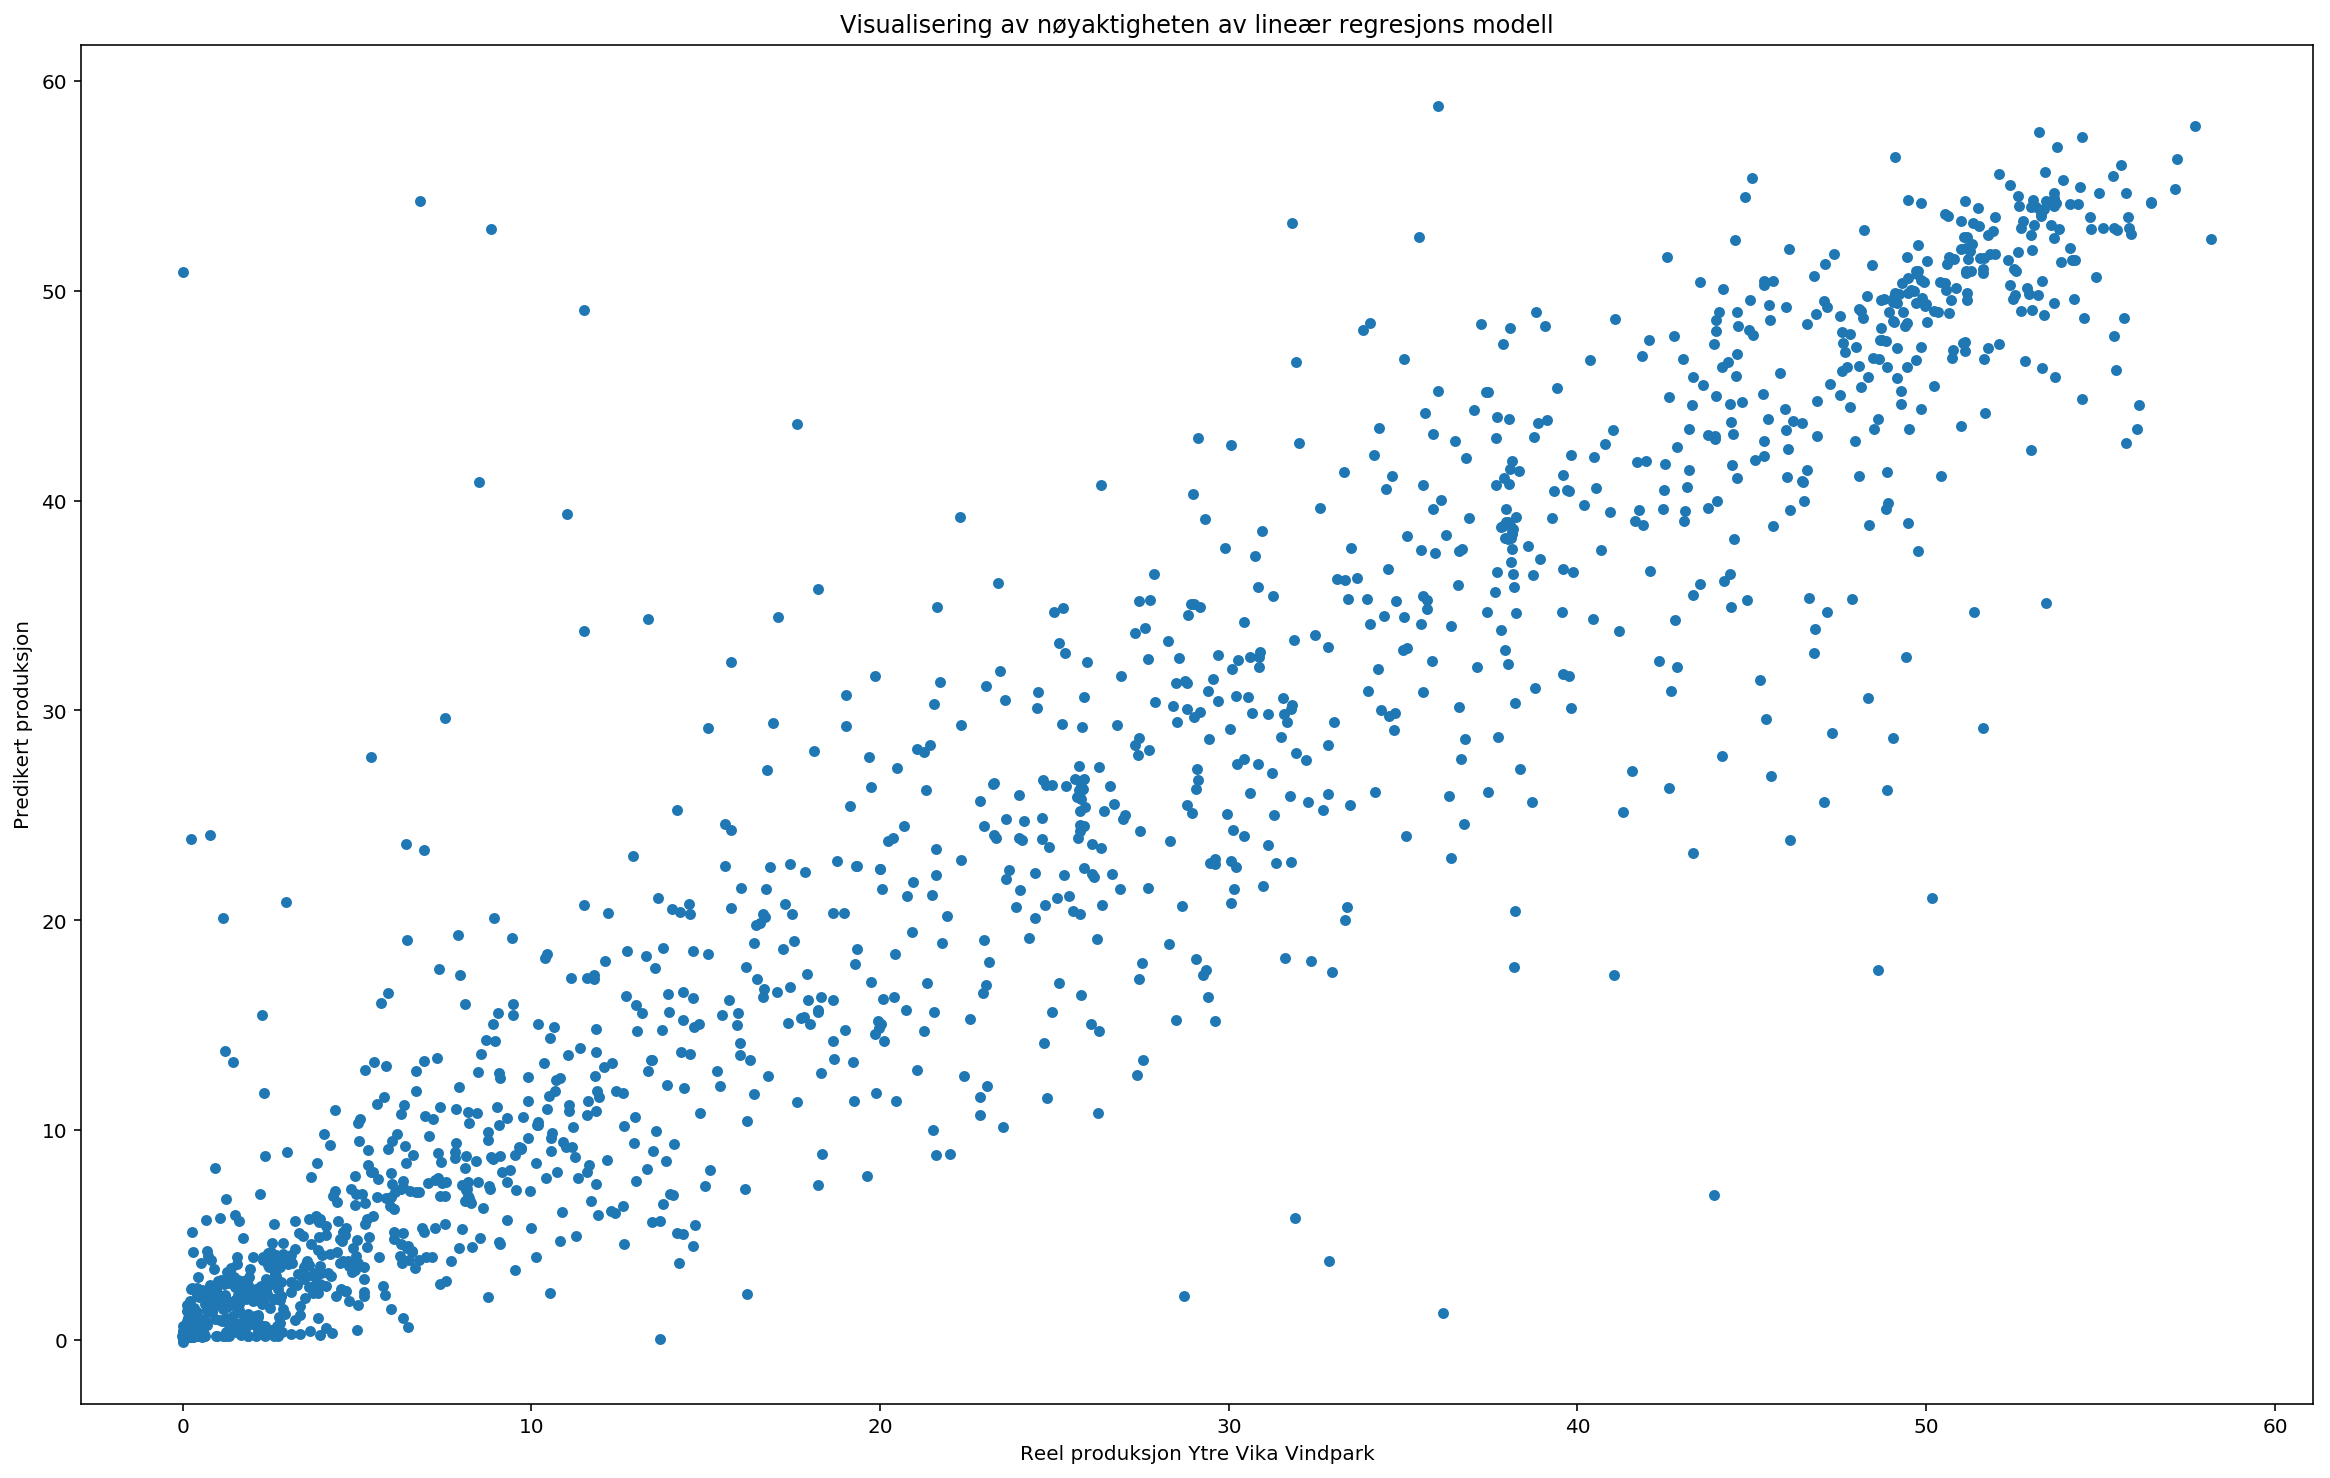

In [30]:
# Bedre figur:
plt.figure(figsize=(20, 12.5))
plt.scatter(y_test,final_preds, s = 20)

plt.xlabel('Reel produksjon Ytre Vika Vindpark')
plt.ylabel('Predikert produksjon')
plt.title('Visualisering av nøyaktigheten av lineær regresjons modell')

#### Treningsdata + Testdata

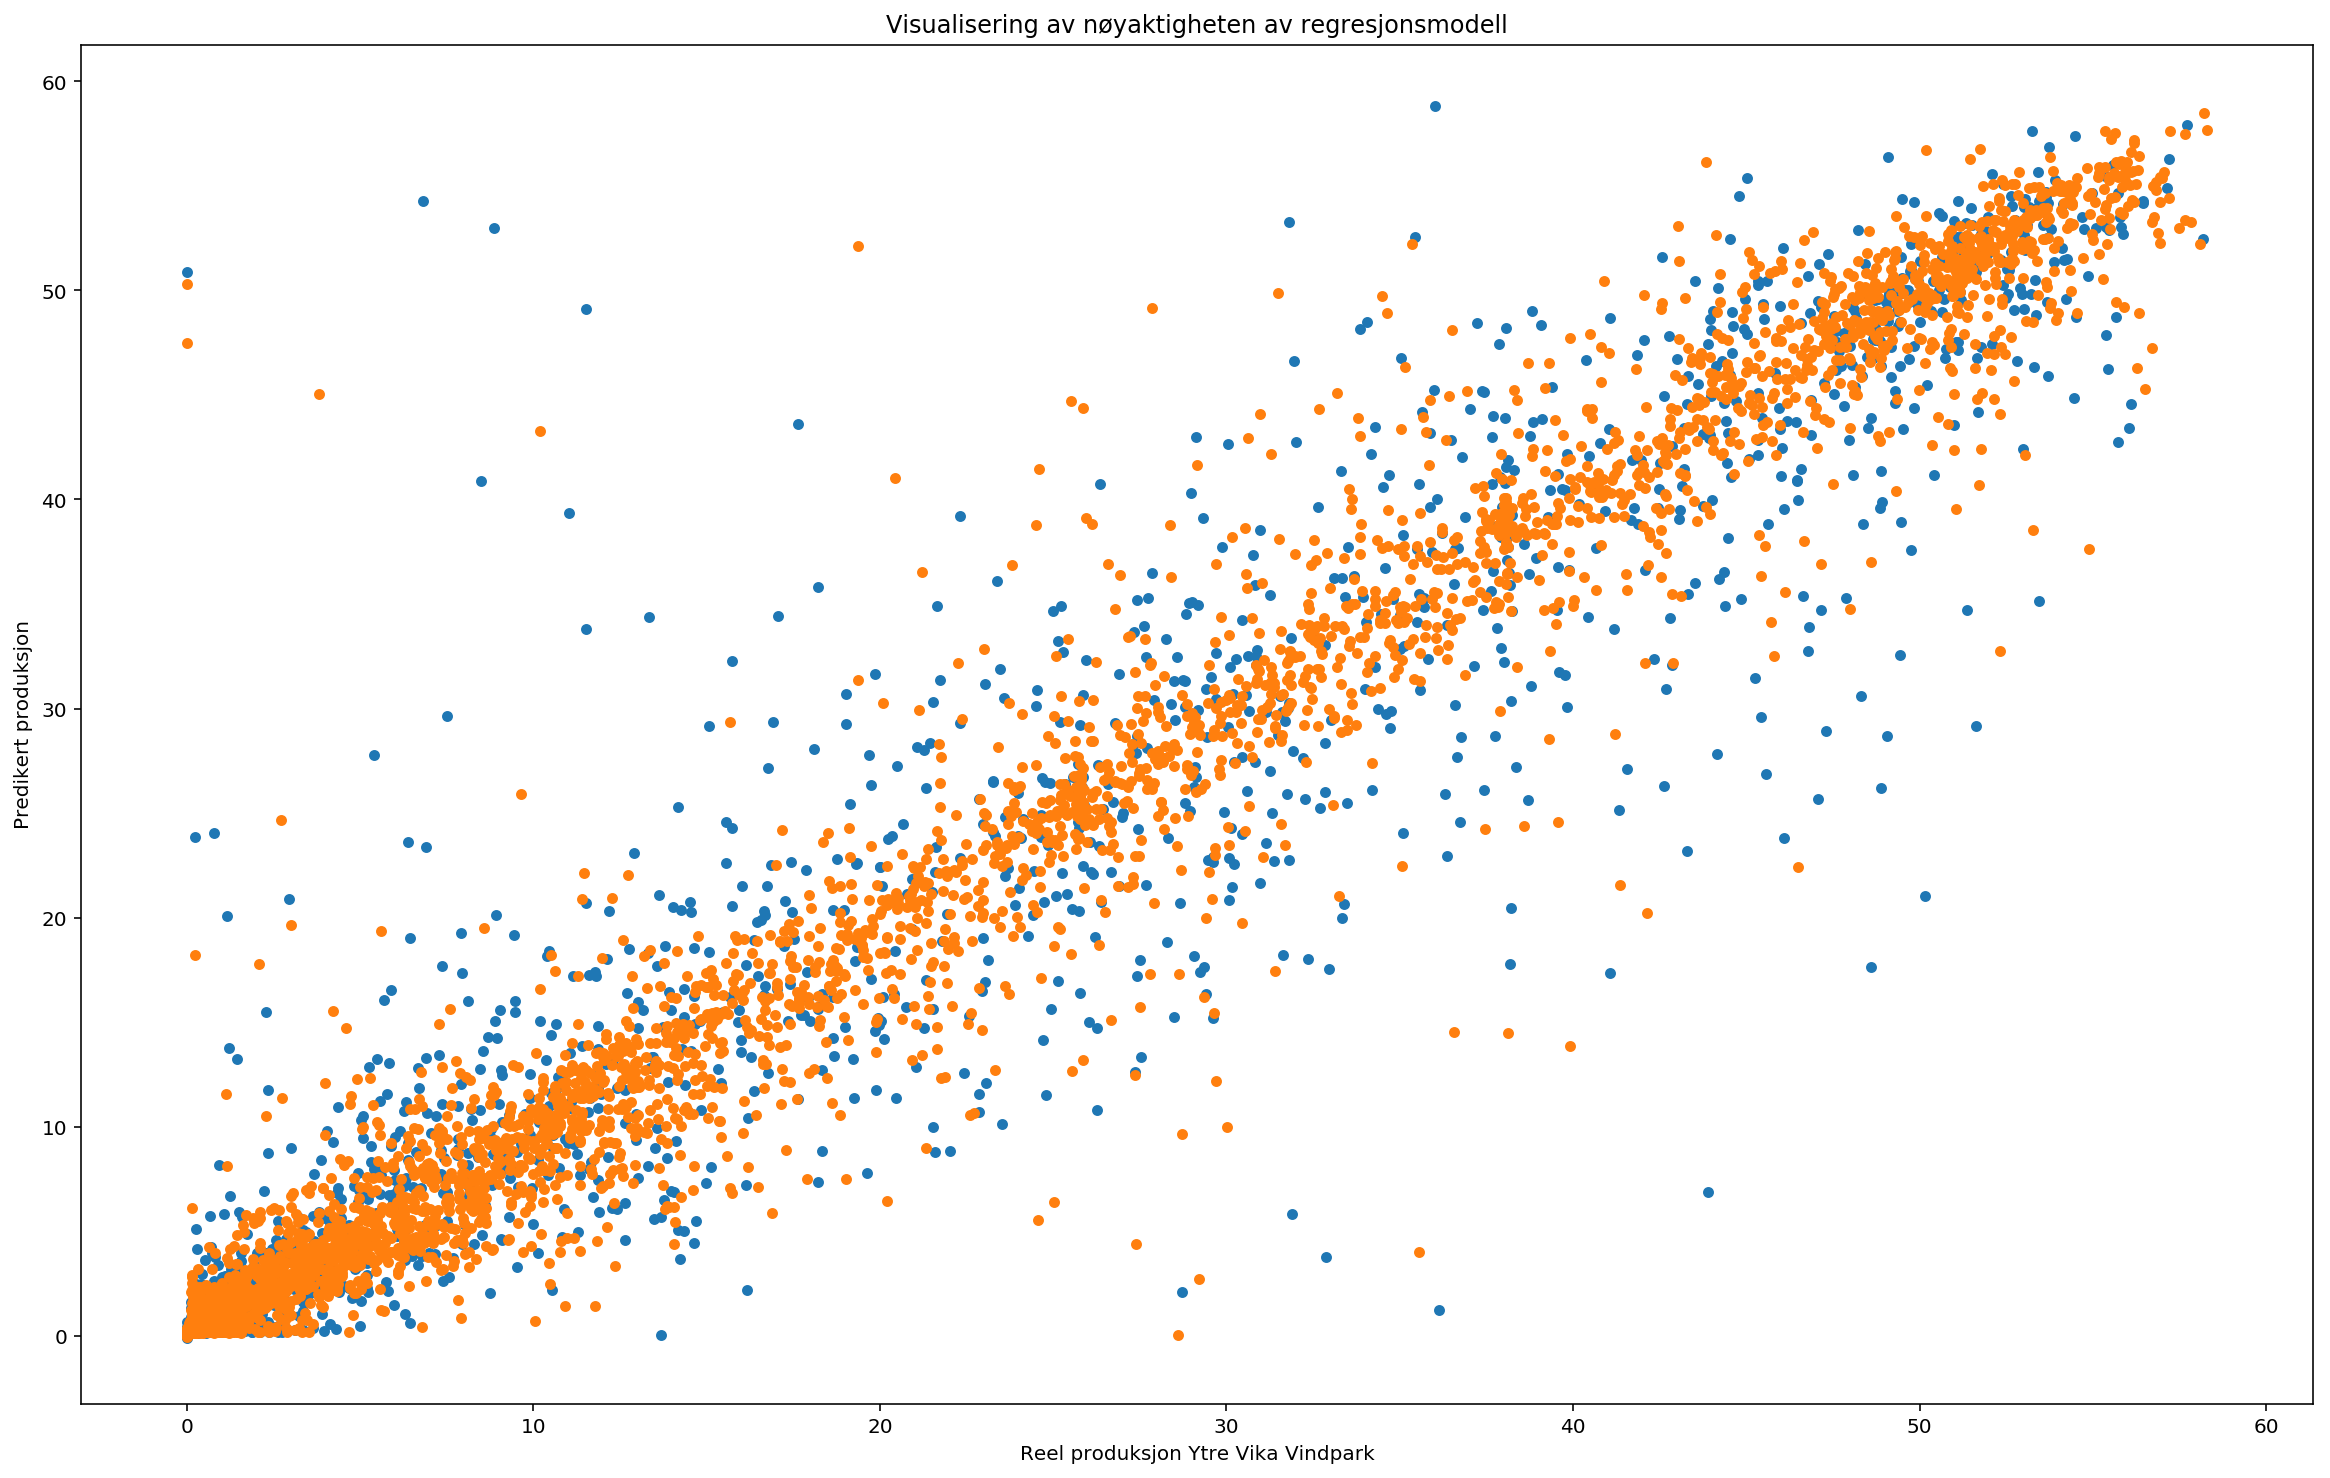

In [31]:
# Bedre figur:
plt.figure(figsize=(20, 12.5))
plt.scatter(y_test,final_preds, s = 20)
plt.scatter(y_train,train_preds, s = 20)

plt.xlabel('Reel produksjon Ytre Vika Vindpark')
plt.ylabel('Predikert produksjon')
plt.title('Visualisering av nøyaktigheten av regresjonsmodell')

# Ytterligere undersøkelser av resultatene

#### Testdata

In [32]:
predictions = list(final_preds)


predictions_list = []
for pred in predictions:
    predictions_list.append(pred[0])

In [33]:
Oversikt = pd.DataFrame(data = {'real': y_test, 'predicitions': predictions_list})

In [34]:
Oversikt.head(10)

,predicitions,real
0,43.400528,48.502850
1,10.421514,16.184982
2,6.490728,13.764366
3,8.814597,6.604967
4,44.583736,43.294865
5,41.533581,38.061733
6,3.643010,6.288116
7,45.575058,47.233982
8,0.180720,0.194867
9,20.359865,18.652933


In [35]:
Oversikt['differanse'] = Oversikt['real'] - Oversikt['predicitions']  

In [36]:
Oversikt['abs_diff'] = Oversikt['differanse'].apply(abs)

In [37]:
Oversikt.head()

,predicitions,real,differanse,abs_diff
0,43.400528,48.502850,5.102322,5.102322
1,10.421514,16.184982,5.763469,5.763469
2,6.490728,13.764366,7.273638,7.273638
3,8.814597,6.604967,-2.209630,2.209630
4,44.583736,43.294865,-1.288872,1.288872


In [38]:
#Oversikt['abs_diff'].hist(bins = 30)

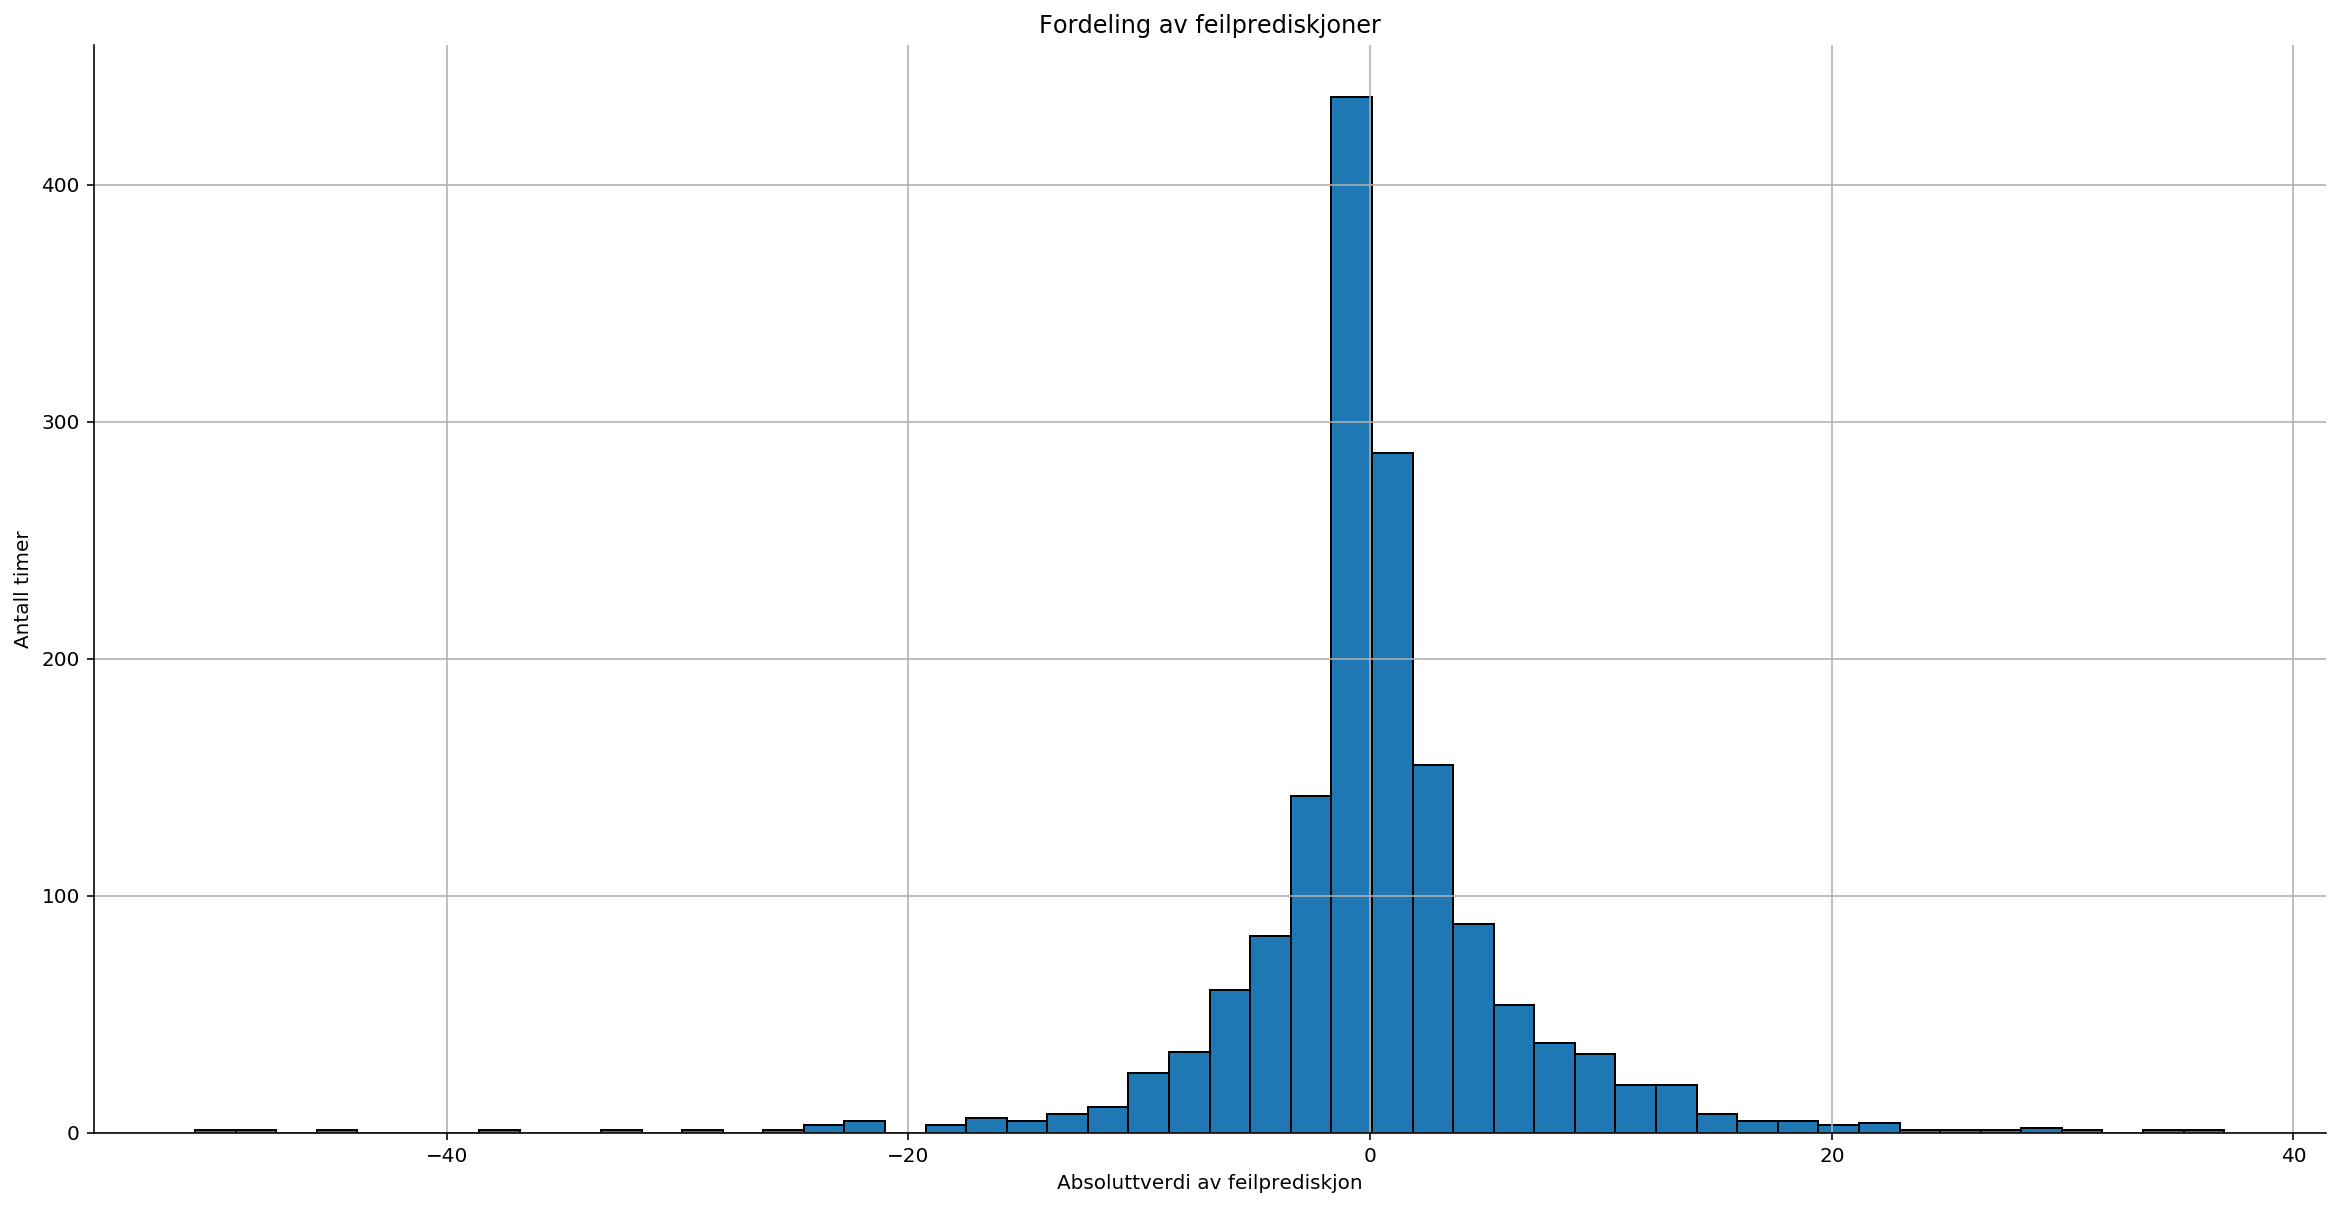

In [39]:
ax = Oversikt['differanse'].hist(bins=50,figsize = (20,10))

plt.xlabel('Absoluttverdi av feilprediskjon')
plt.ylabel('Antall timer')
plt.title('Fordeling av feilprediskjoner')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig = ax.get_figure()
#fig.savefig('hist av abs.png')

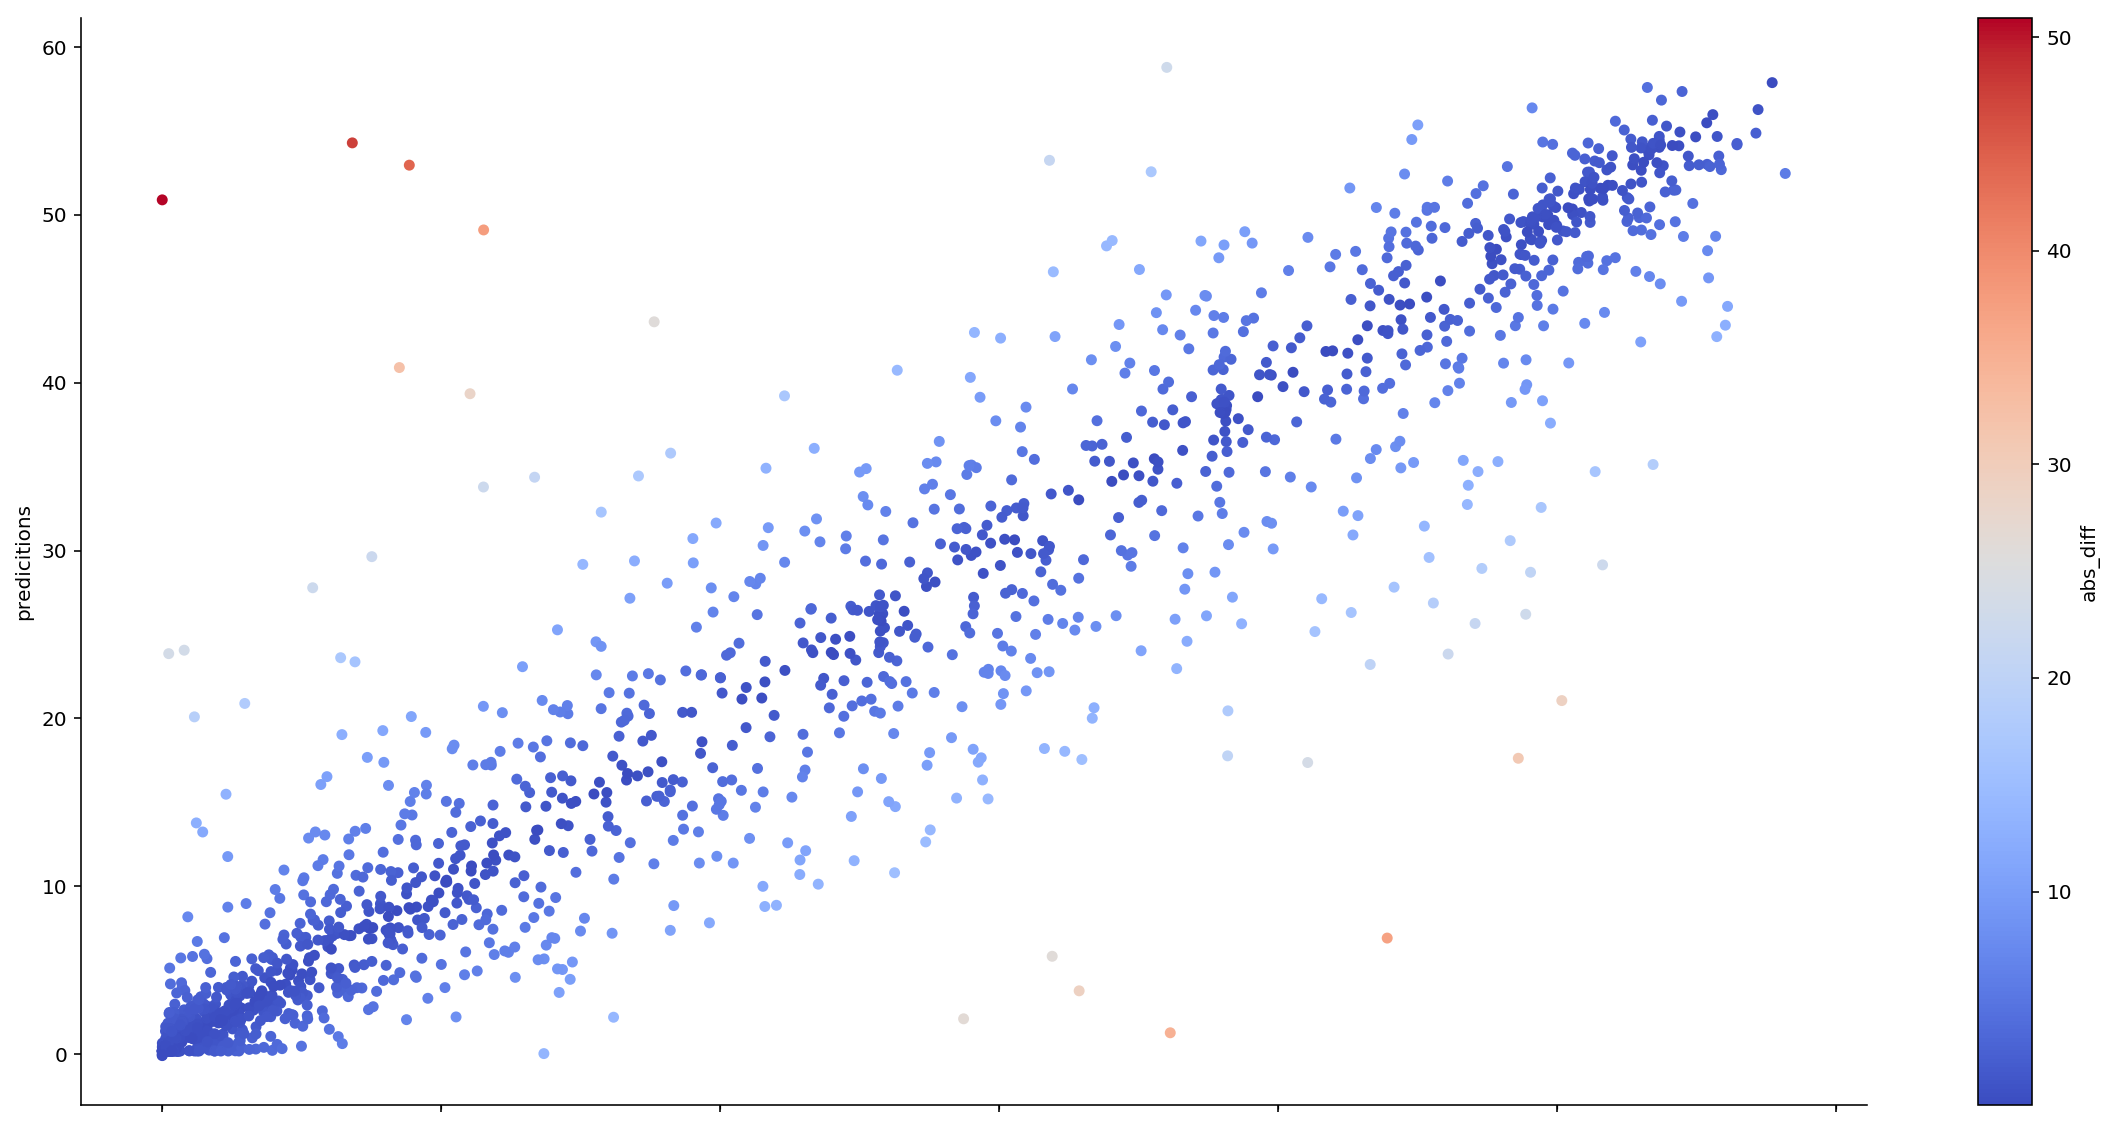

In [40]:
ax = Oversikt.plot.scatter(x='real',y='predicitions',
                   c='abs_diff',cmap='coolwarm', figsize = (20,10))

ax.set_xlabel("x label")

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig = ax.get_figure()
#fig.savefig('keras_model.png')

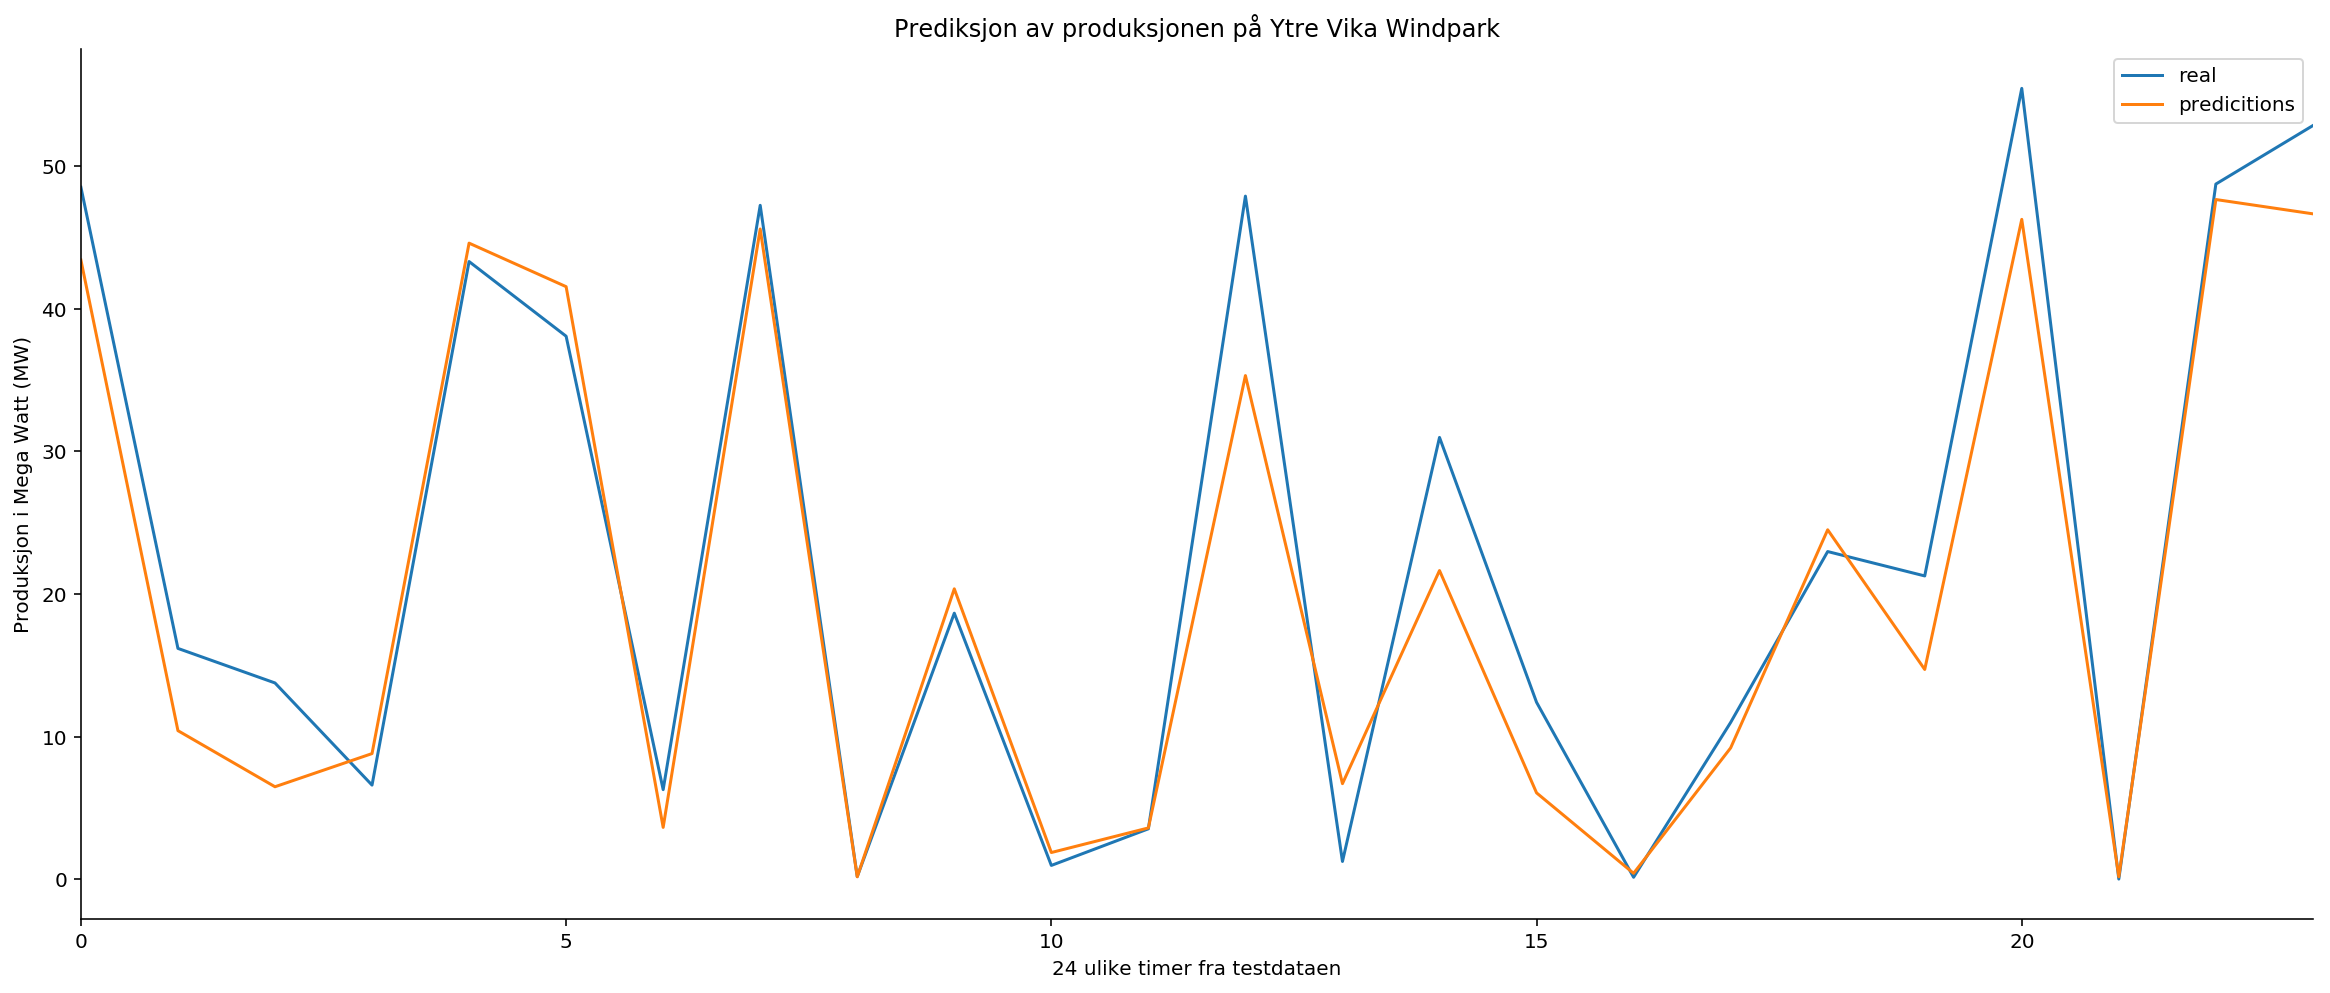

In [41]:
ax = Oversikt['real'].head(24).plot(figsize=(20,8))
ax = Oversikt['predicitions'].head(24).plot(figsize=(20,8))

plt.xlabel('24 ulike timer fra testdataen')
plt.ylabel('Produksjon i Mega Watt (MW)')
plt.title('Prediksjon av produksjonen på Ytre Vika Windpark')

plt.legend(loc='best')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Saves figure
fig = ax.get_figure()
#fig.savefig('24_punkter.png')

#### Inkludere treningsdata

In [42]:
predictions_train = list(train_preds)


predictions_train_list = []
for pred in predictions_train:
    predictions_train_list.append(pred[0])

In [43]:
Oversikt_trening = pd.DataFrame(data = {'real': y_train, 'predicitions': predictions_train_list})

In [44]:
Oversikt_trening['differanse'] = Oversikt_trening['real'] - Oversikt_trening['predicitions']  
Oversikt_trening['abs_diff'] = Oversikt_trening['differanse'].apply(abs)

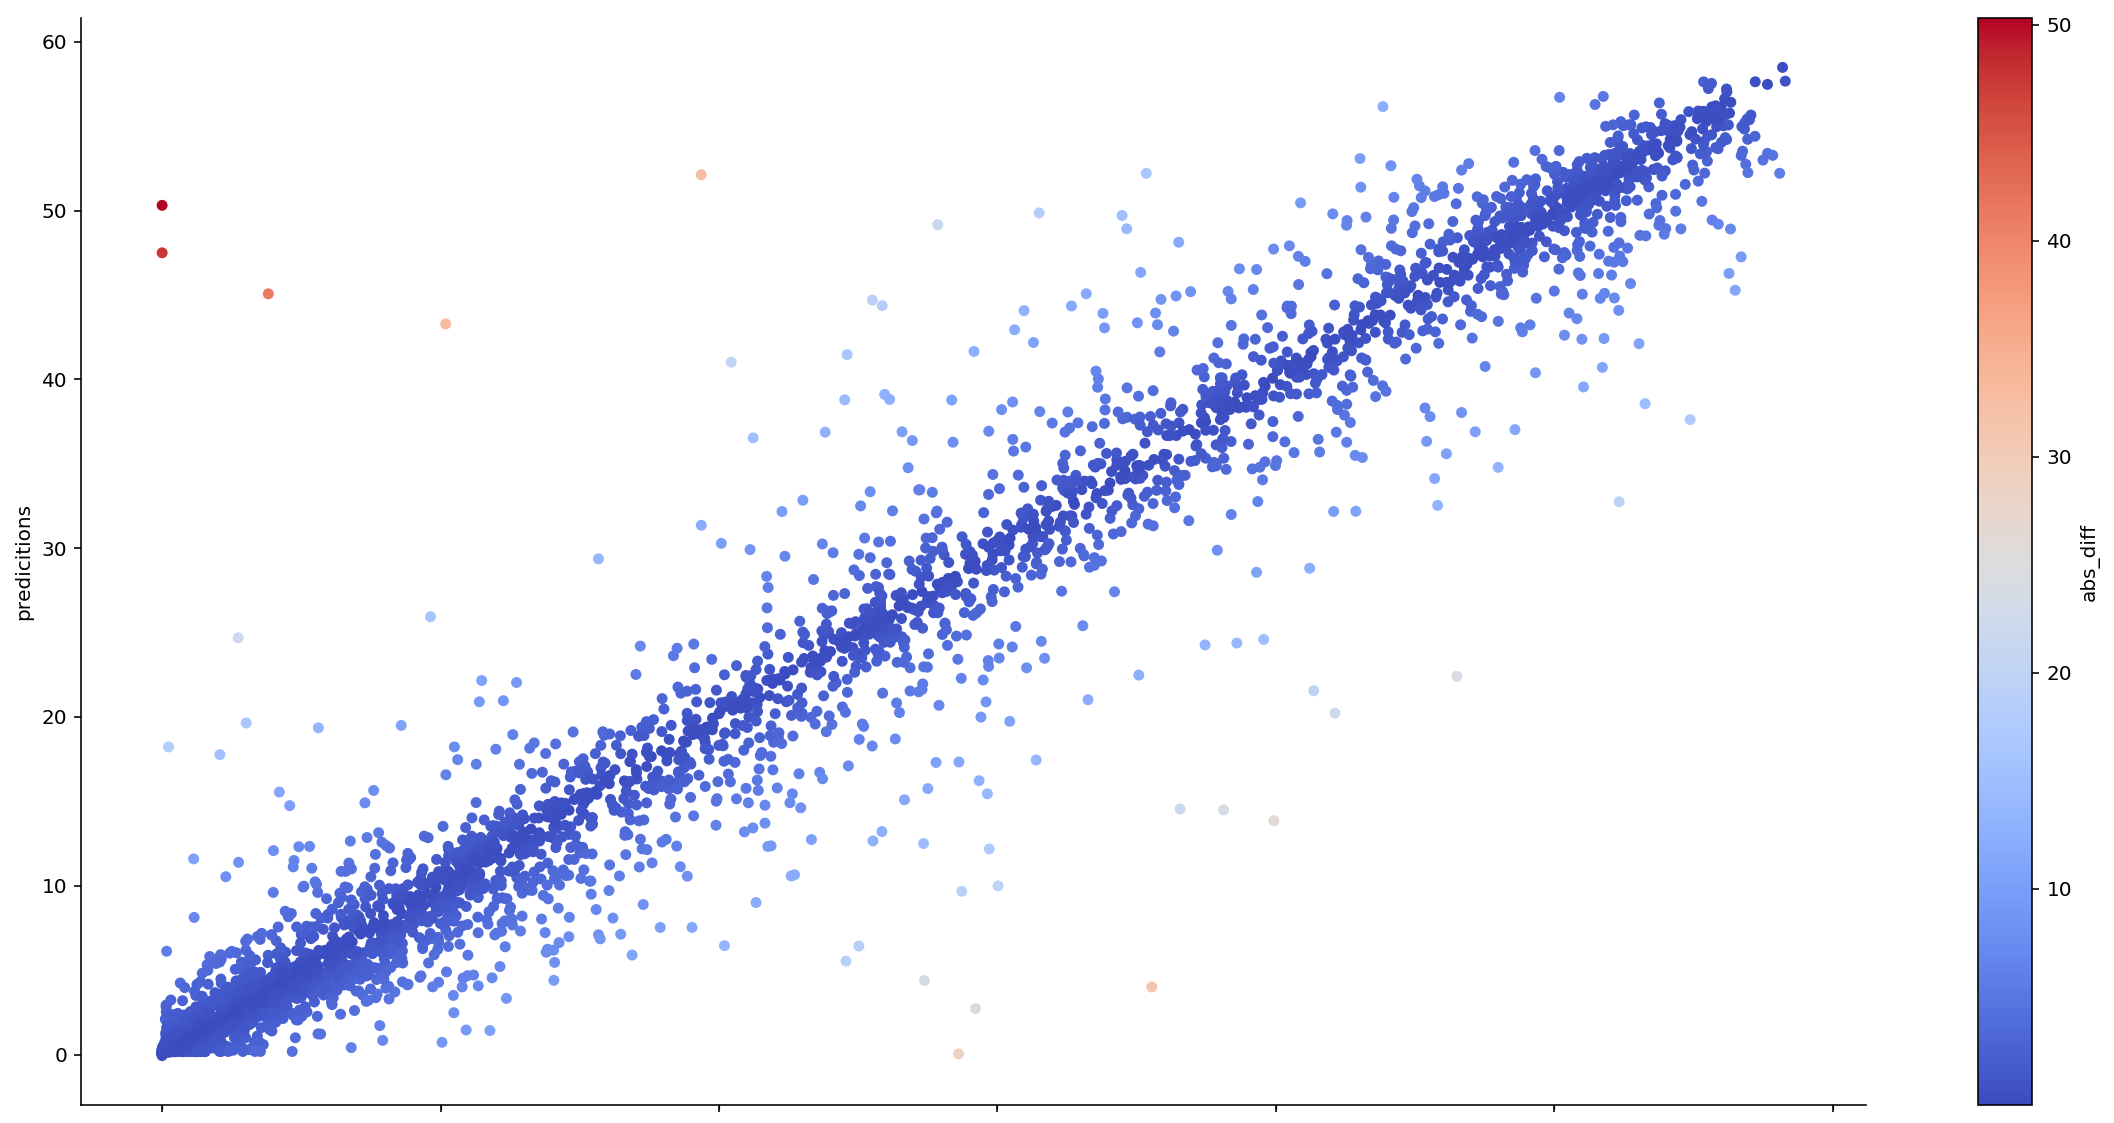

In [45]:
ax = Oversikt_trening.plot.scatter(x='real',y='predicitions',
                   c='abs_diff',cmap='coolwarm', figsize = (20,10))

ax.set_xlabel("x label")

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig = ax.get_figure()
#fig.savefig('keras_model.png')

 #### Sammenstille og plotte data

In [46]:
Oversikt_komplett = pd.concat([Oversikt,Oversikt_trening])

In [47]:
Oversikt_komplett.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5187 entries, 0 to 3629
Data columns (total 4 columns):
predicitions    5187 non-null float64
real            5187 non-null float32
differanse      5187 non-null float64
abs_diff        5187 non-null float64
dtypes: float32(1), float64(3)
memory usage: 182.4 KB


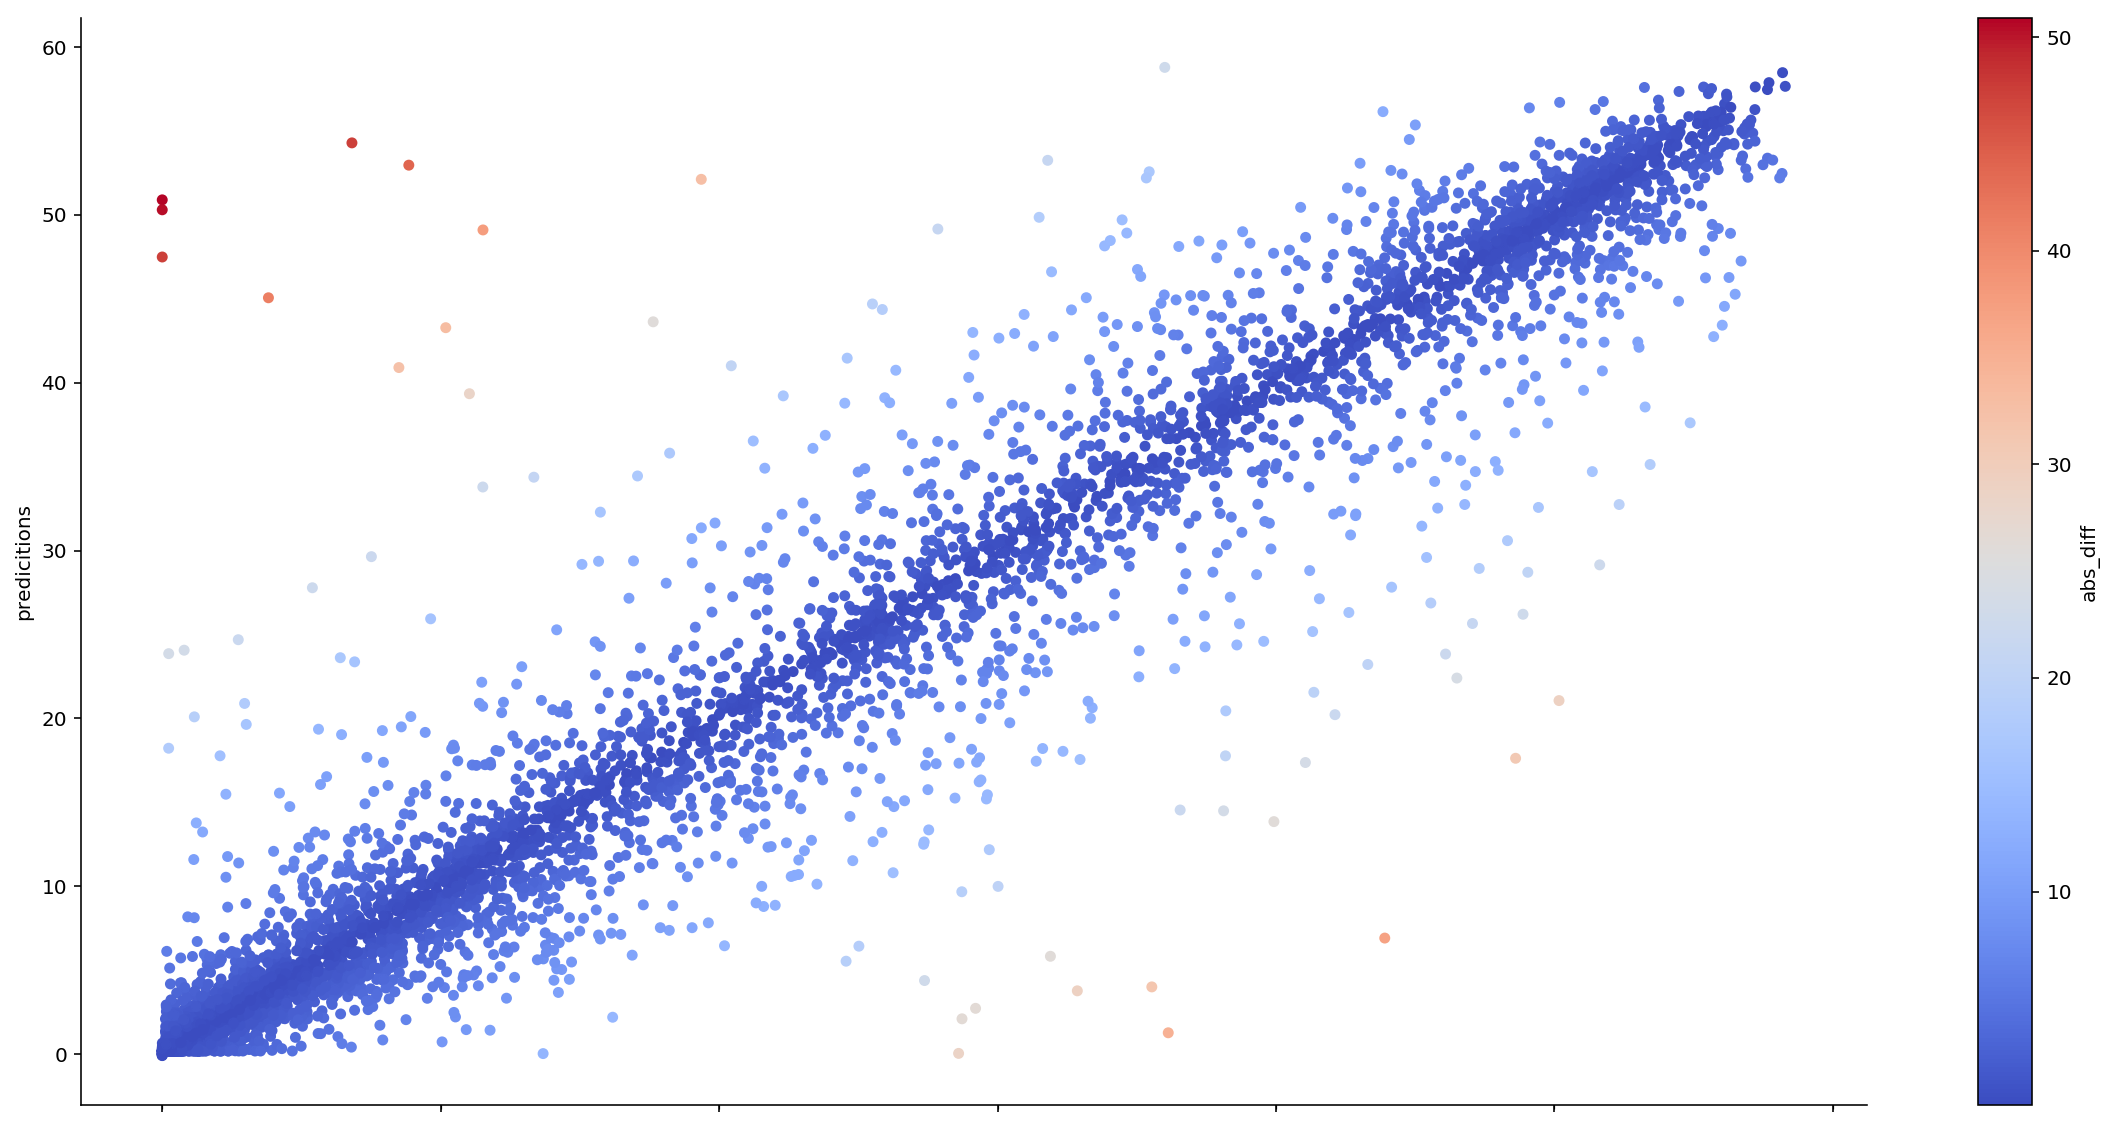

In [48]:
ax = Oversikt_komplett.plot.scatter(x='real',y='predicitions',
                   c='abs_diff',cmap='coolwarm', figsize = (20,10))

ax.set_xlabel("x label")

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig = ax.get_figure()
#fig.savefig('keras_model_komplett.png')

# Ekte plott av prediksjonene

#### Forsøk på å hente ut 1. september

In [49]:
sept = finished_model.predict(x[0:1000,:])

In [50]:
predictions_sept = list(sept)


predictions_sept_list = []
for pred in predictions_sept:
    predictions_sept_list.append(pred[0])

In [51]:
September = pd.DataFrame(data = {'real': y[0:1000], 'predicitions': predictions_sept_list})

In [52]:
September.head()

,predicitions,real
0,29.728456,24.097782
1,30.304585,29.852798
2,30.258345,29.481783
3,24.014187,30.434999
4,29.812710,27.689482


In [53]:
data_raw.dropna(inplace=True)
data_raw.reset_index(inplace=True)

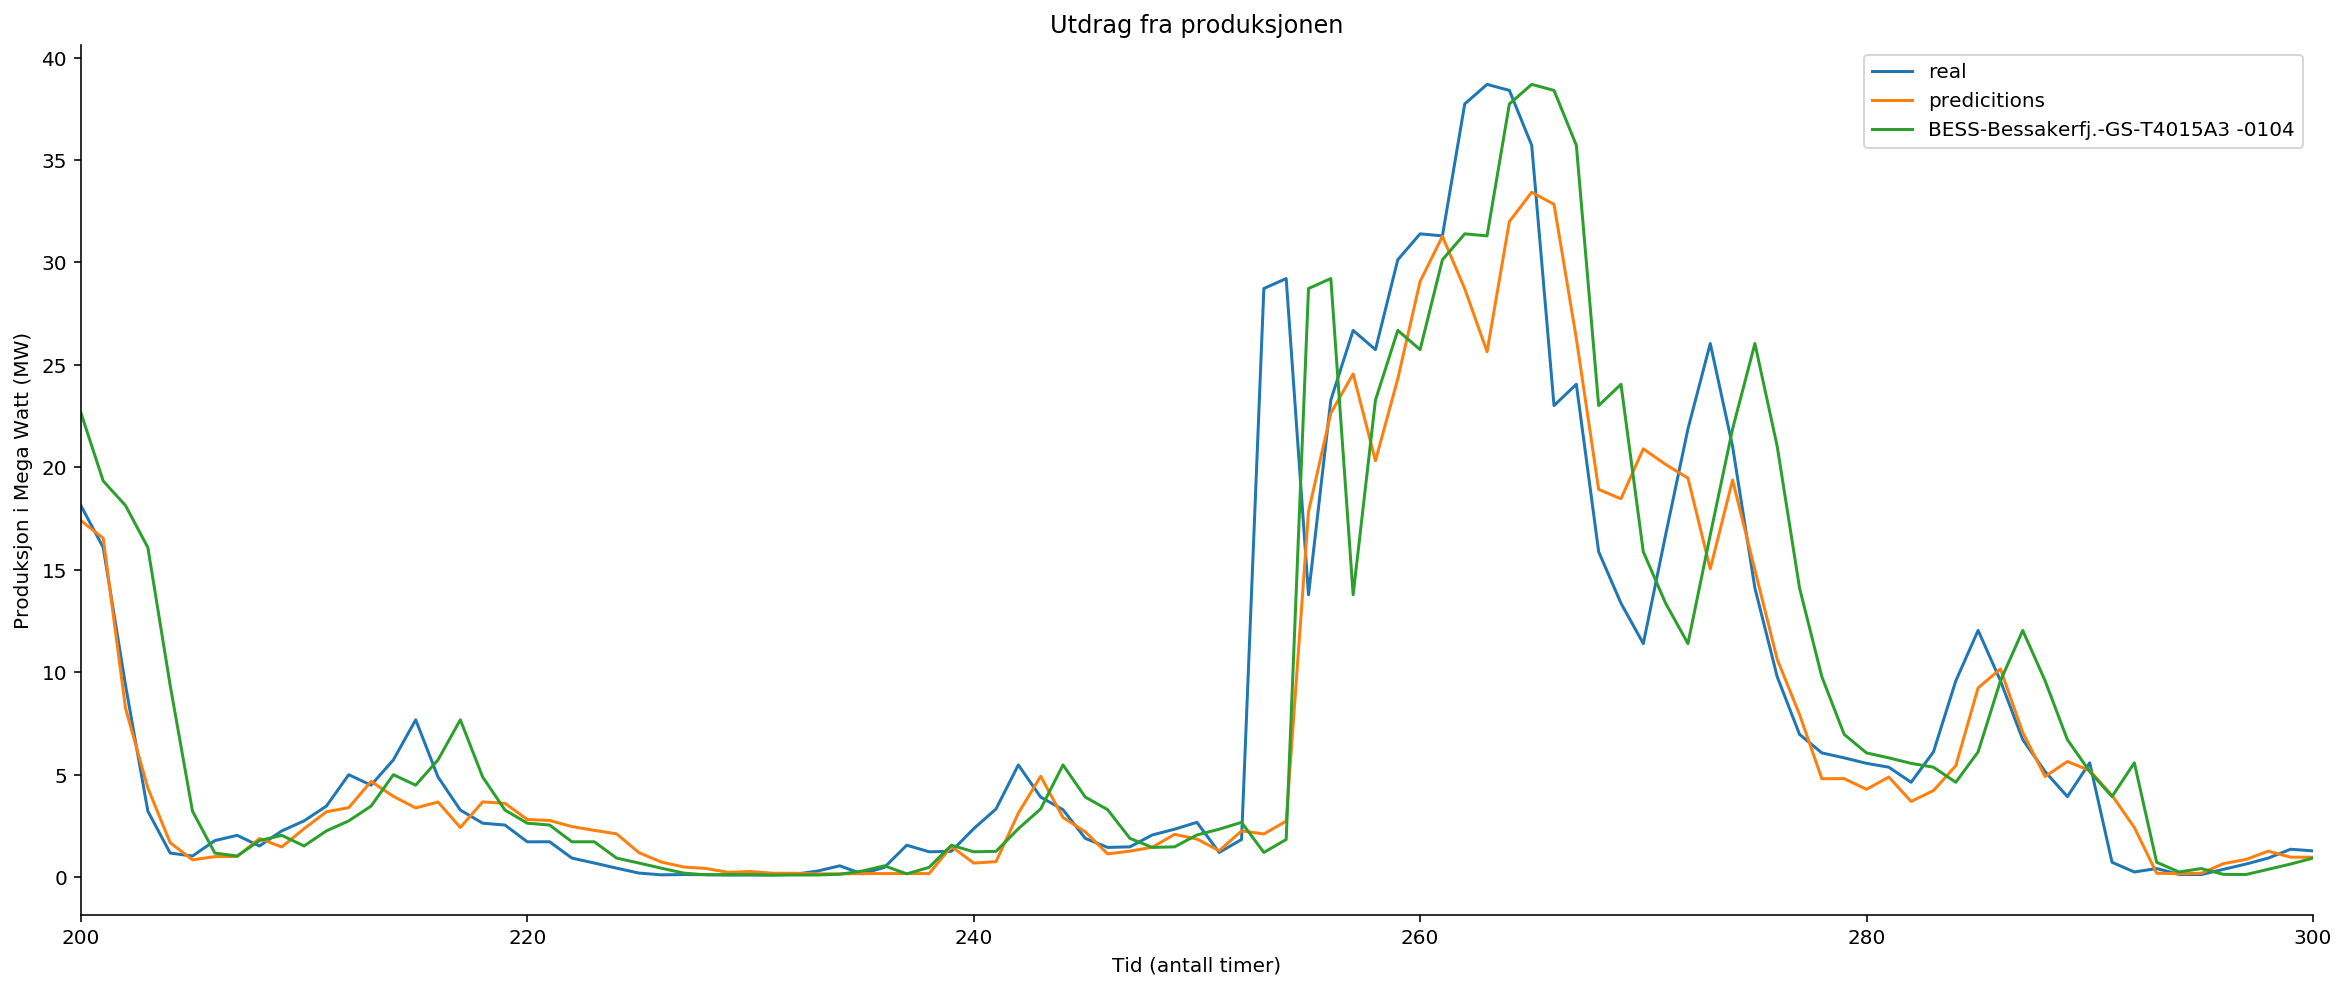

In [54]:
# Justere tidslinjen på plottet
start = 200
slutt = 300

ax = September.loc[start:slutt,'real'].plot(figsize=(20,8))
ax = September.loc[start:slutt,'predicitions'].plot(figsize=(20,8))
ax = data_raw.loc[start:slutt,'BESS-Bessakerfj.-GS-T4015A3 -0104'].plot(figsize=(20,8))

 
plt.xlabel('Tid (antall timer)')
plt.ylabel('Produksjon i Mega Watt (MW)')
plt.title('Utdrag fra produksjonen')

plt.legend(loc='best')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Saves figure
fig = ax.get_figure()
#fig.savefig('september10.png')

In [55]:
data_raw.head()

,index,BESS-Bessakerfj.-G1-T4015A3 -0104,RRS.S2464.Gunit.M1-7 G1.AVL,BESS-Bessakerfj.-G2-T4015A3 -0104,RRS.S2464.Gunit.M1-7 G2.AVL,BESS-Bessakerfj.-G3-T4015A3 -0104,RRS.S2464.Gunit.M1-7 G3.AVL,BESS-Bessakerfj.-G4-T4015A3 -0104,RRS.S2464.Gunit.M1-7 G4.AVL,BESS-Bessakerfj.-G5-T4015A3 -0104,...,DNMI_72580...........T0015A3-0120,/arome_windvel_6447_1156,STORM-Bess-Vindretn-25km,STORM-Bess-Vindhast-25km,/arome_windvel_6422_1040,/arome_airtemp_6422_1040,/arome_windvel_6421_1035,/arome_airtemp_6421_1035,BESS-Bessakerfj.-GS-T4015A3 -0104.1,Target
0,0,1.429567,1,1.530417,1,0.587017,1,1.393733,1,0.593583,...,4.0,4.454652,322,8.7,5.189602,8.61660,5.216028,9.34414,22.764865,24.097782
1,1,1.428450,1,1.675450,1,0.596433,1,1.440050,1,0.600450,...,4.3,4.320184,322,8.8,5.052448,8.73037,5.232161,9.57412,24.441216,29.852799
2,2,1.601617,1,1.681950,1,0.598683,1,1.802783,1,0.595733,...,3.6,4.497287,323,8.9,5.894857,8.42202,5.845585,9.13784,24.097782,29.481782
3,3,1.761867,1,1.763900,1,0.593400,1,1.757700,1,0.597167,...,2.9,4.947569,325,9.1,5.470578,8.56190,5.615974,9.37002,29.852799,30.434999
4,4,1.767500,1,1.919383,1,0.598250,1,1.764233,1,0.596600,...,3.0,4.259005,327,9.4,5.622112,8.48257,5.433630,8.94302,29.481782,27.689482


In [56]:
len(X_test)

1557